In [30]:
# ============================================
# CARBON BUDGET "FUEL TANK" CALCULATOR
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Circle
from datetime import datetime
import matplotlib as mpl

mpl.rcParams['font.family'] = 'LCD'

# Load your CO2 data
co2_data = pd.read_csv('data/co2_mm_mlo.csv', comment='#')

# ============================================
# STEP 1: CALCULATE EMISSIONS USED
# ============================================

# Carbon budget parameters (IPCC AR6, 2021)
CARBON_BUDGET_START = 500  # GtCO2 from Jan 2020
BUDGET_START_DATE = datetime(2020, 1, 1)
budget_end_date = datetime(2100, 1, 1)
ANNUAL_EMISSIONS = 37.4  # GtCO2 per year (Global Carbon Project 2023)

# Calculate time elapsed since budget start
current_date = datetime.now()
years_elapsed = (current_date - BUDGET_START_DATE).total_seconds() / (365.25 * 24 * 3600)

# Calculate emissions used
emissions_used = ANNUAL_EMISSIONS * years_elapsed
budget_remaining = CARBON_BUDGET_START - emissions_used

# Calculate percentages
pct_used = (emissions_used / CARBON_BUDGET_START) * 100
pct_remaining = 100 - pct_used

# Calculate budget today
budget_time = 2100 - 2020
budget_per_year = CARBON_BUDGET_START / budget_time
current_budget = years_elapsed * budget_per_year

print("CARBON BUDGET 'FUEL TANK' CALCULATION")
print("=" * 60)
print(f"Starting budget (Jan 2020):    {CARBON_BUDGET_START} GtCO₂")
print(f"Timespan for Budget use:       {budget_time} years")
print(f"Years elapsed since 2020:      {years_elapsed:.2f} years")
print(f"Current budget limit:          {current_budget:.1f} GtCO₂")
print(f"Emissions used so far:         {emissions_used:.1f} GtCO₂")
print(f"Annual emissions rate:         {ANNUAL_EMISSIONS} GtCO₂/year")
print(f"Budget remaining:              {budget_remaining:.1f} GtCO₂")
print(f"Percentage used:               {pct_used:.1f}%")
print(f"Percentage remaining:          {pct_remaining:.1f}%")
print("=" * 60)

CARBON BUDGET 'FUEL TANK' CALCULATION
Starting budget (Jan 2020):    500 GtCO₂
Timespan for Budget use:       80 years
Years elapsed since 2020:      6.04 years
Current budget limit:          37.8 GtCO₂
Emissions used so far:         226.1 GtCO₂
Annual emissions rate:         37.4 GtCO₂/year
Budget remaining:              273.9 GtCO₂
Percentage used:               45.2%
Percentage remaining:          54.8%


In [31]:
colors = {'green': '#2dc937',
          'light_green': '#99c140',
          'yellow': '#e7b416',
          'orange': '#db7b2b',
          'red': '#cc3232'
          }

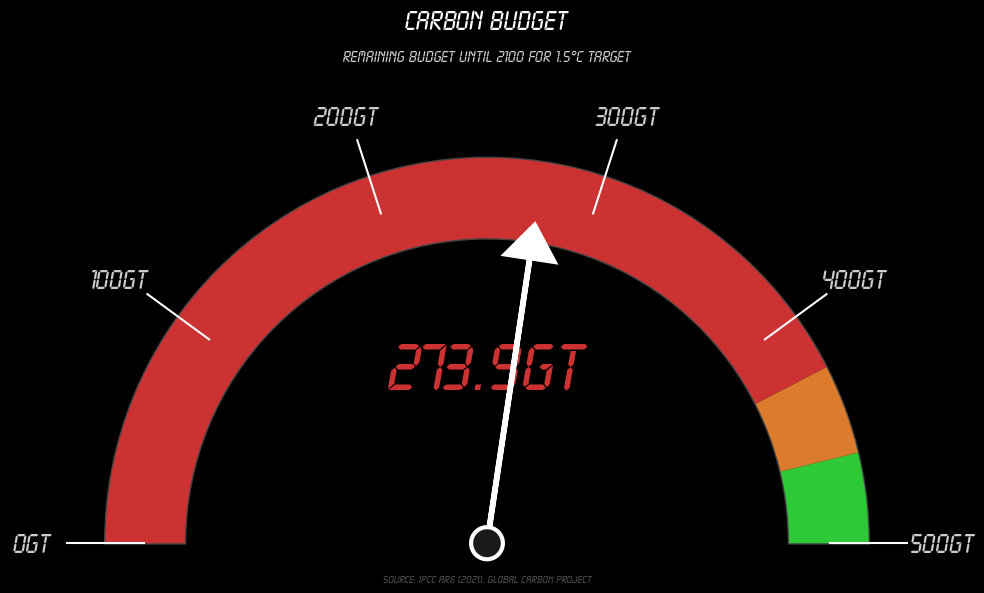

  Needle position: 45.2% used


In [34]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#000000')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-0.1, 1.5)
ax.axis('off')
ax.set_facecolor('#000000')

# Draw gauge arc (semi-circle)
# Empty (right) to Full (left)
theta_start = 180  # Right side
theta_end = 0  # Left side

emission_min = 0
emission_max = 500
emission_range = emission_max - emission_min

# Calculate angles for emission
def emission_to_angle(emission):
        pct = (emission - emission_min) / emission_range
        return theta_start + pct * (theta_end - theta_start)

# Background arc (full capacity)
bg_arc = Wedge((0, 0), 1.2, theta_end, theta_start, width=0.25,
               facecolor='#2a2a2a', edgecolor='#444444', linewidth=2)
ax.add_patch(bg_arc)

# Calculate needle angle
# 0% used = 0° (right, "Full"), 100% used = 180° (left, "Empty")
needle_angle = pct_used * 1.8  # Scale to 180 degrees

# Used portion (red arc) - from right going left
current_budget_angle = emission_to_angle(emission_max - current_budget)
used_arc = Wedge((0, 0), 1.2, theta_end, current_budget_angle, width=0.25,
                 facecolor=colors['green'], edgecolor='none')
ax.add_patch(used_arc)

# Double the budget limit
double_budget_angle = emission_to_angle(emission_max - (current_budget*2))
middle_arc = Wedge((0, 0), 1.2, current_budget_angle, double_budget_angle, width=0.25,
                 facecolor=colors['orange'], edgecolor='none')
ax.add_patch(middle_arc)

# Remaining portion (green arc)
remaining_arc = Wedge((0, 0), 1.2, double_budget_angle, theta_start, width=0.25,
                      facecolor=colors['red'], edgecolor='none')
ax.add_patch(remaining_arc)

# Add tick marks and labels
tick_values = [500, 400, 300, 200, 100, 0]
for em_val in tick_values:
    angle = emission_to_angle(em_val)
    angle_rad = np.radians(angle)
    
    # Tick mark
    x_outer = 1.32 * np.cos(angle_rad)
    y_outer = 1.32 * np.sin(angle_rad)
    x_inner = 1.08 * np.cos(angle_rad)
    y_inner = 1.08 * np.sin(angle_rad)
    ax.plot([x_inner, x_outer], [y_inner, y_outer], 
            color='white', linewidth=2 if em_val in [1.5, 2.0] else 1.5)
    
    # Label
    x_label = 1.43 * np.cos(angle_rad)
    y_label = 1.4 * np.sin(angle_rad)
    
    label_text = f'{em_val}Gt'
    if em_val == 1.5:
        ax.text(x_label, y_label, label_text, 
                ha='center', va='center', fontsize=20, 
                color=colors['orange'], fontweight='bold')
    elif em_val == 2.0:
        ax.text(x_label, y_label, label_text, 
                ha='center', va='center', fontsize=20, 
                color=colors['red'], fontweight='bold')
    else:
        ax.text(x_label, y_label, label_text, 
                ha='center', va='center', fontsize=20, 
                color='#cccccc')

# Draw needle
needle_rad = np.radians(needle_angle)
needle_x = 0.9 * np.cos(needle_rad)
needle_y = 0.9 * np.sin(needle_rad)
ax.arrow(0, 0, needle_x, needle_y, head_width=0.15, head_length=0.1,
         fc='white', ec='white', linewidth=4, zorder=2)

# Center hub
center = Circle((0, 0), 0.05, facecolor='#1a1a1a', edgecolor='white', linewidth=3, zorder=11)
ax.add_patch(center)

# Center display - remaining
emissions_remaining = emission_max - emissions_used   
ax.text(0, 0.55, f'{emissions_remaining:.1f}Gt', fontsize=50,
        color=colors['red'], ha='center', va='center', fontweight='bold', zorder=1)

# Title
ax.text(0, 1.6, 'CARBON BUDGET', fontsize=20,
        fontweight='bold', color='#ffffff', ha='center', va='bottom')
ax.text(0, 1.5, 'Remaining Budget until 2100 for 1.5°C Target', fontsize=12,
        color='#cccccc', ha='center', va='bottom', style='italic')

# Source
ax.text(0, -0.1, 'Source: IPCC AR6 (2021), Global Carbon Project',
        fontsize=8, color='#555555', ha='center', va='top')

plt.tight_layout()
#plt.savefig('visualizations/carbon_budget_fuel_gauge.png', dpi=300,
#            bbox_inches='tight', facecolor='#000000', edgecolor='none')
plt.show()

print(f"  Needle position: {pct_used:.1f}% used")
